In [1]:
# Import required libraries
import os
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
# If memory problems, reduce batch size to 32 or 16
batch_size = 64

In [3]:
# Dir containing images. It should have subfolders 'train' and 'valid'
# 'train' folder contains training images. 'valid' folder contains validation images
# It can optionally also contain 'test' folder containing test images
cwd = os.getcwd()
data_dir = '{0}/../data/print_densities'.format(cwd)

In [4]:
# Path where trained model will be stored
trained_model_file = '{0}/../models/print_densities.pkl'.format(cwd)

In [5]:
# Create data object from images folder. We will use resnet34 and it works
# better with 224 size images, so set size to 224
data = ImageDataBunch.from_folder(path=data_dir, size=224, bs=batch_size)

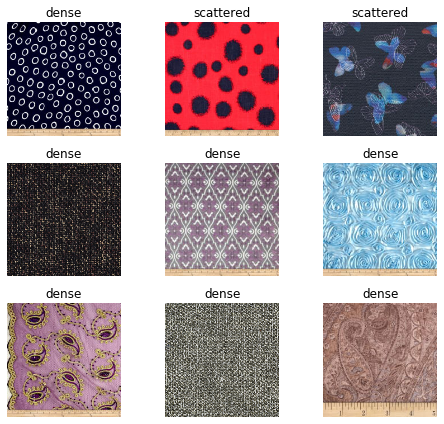

In [6]:
# Display a few images
data.show_batch(rows=3, figsize=(7,6))

In [7]:
# Create CNN learner using resnet34 model. Pass the metrics that we want
# to monitor. Here important metric is error_rate (proportions of instances
# misclassified over total instances). 
learner = cnn_learner(data, models.resnet34, metrics=[error_rate, 
                                                    Precision(average='macro'), 
                                                    Recall(average='macro'), 
                                                    FBeta(average='macro')])

In [8]:
# Train for 20 epochs (20 cycles through all images)
learner.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,precision,recall,f_beta,time
0,0.894198,1.002367,0.557692,0.715686,0.516667,0.416345,00:35
1,0.941780,0.795493,0.500000,0.644928,0.560606,0.490997,00:34
2,0.837584,0.568580,0.326923,0.708931,0.698485,0.680332,00:33
3,0.716287,0.388321,0.153846,0.842424,0.842424,0.842424,00:32
4,0.609783,0.288940,0.115385,0.887500,0.875758,0.877193,00:33
5,0.524395,0.234172,0.096154,0.913078,0.892424,0.894417,00:33
6,0.454085,0.209281,0.076923,0.928125,0.915151,0.916789,00:33
7,0.397691,0.186967,0.076923,0.928125,0.915151,0.916789,00:33
8,0.348823,0.177123,0.076923,0.921212,0.921212,0.921212,00:32
9,0.310526,0.173491,0.057692,0.943932,0.937879,0.938848,00:32


The above shows we got **7.6% error rate** after 10 epocs and didn't drop after that.

In [9]:
# Let's get the confusion matrix and top losses
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

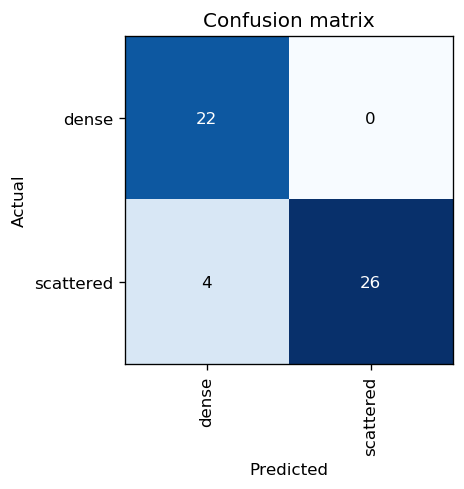

In [10]:
# Plot the confusion matrix to see where model is getting confused most (predicting wrong class)
# NOTE: we don't have even number of examples in our validation set, so 
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

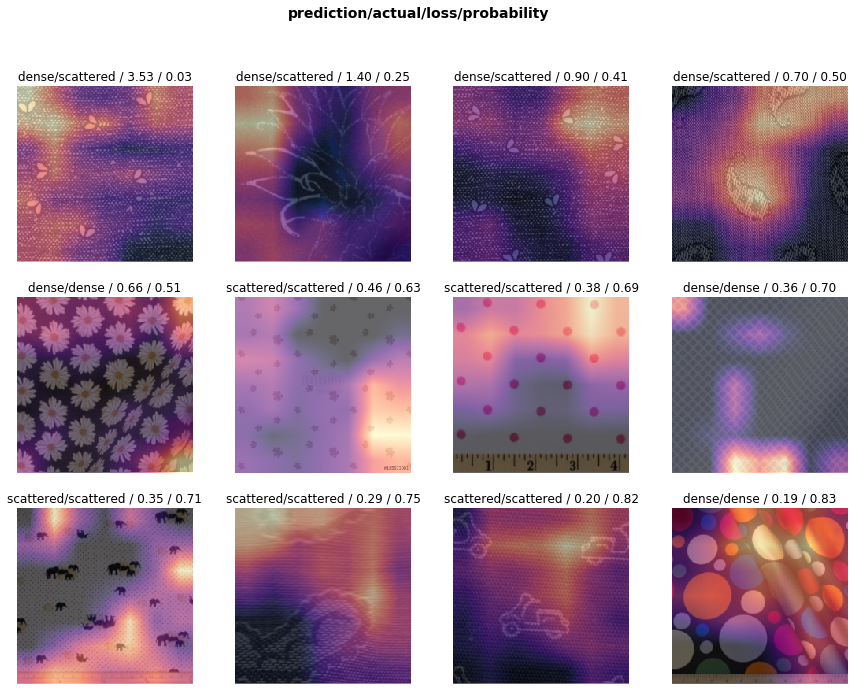

In [11]:
# See where model got it really wrong. The displayed images will show heatmap
# indiciating what area of the image is getting mixed up with wrongly predicted class
interp.plot_top_losses(12, figsize=(15,11))

In [12]:
# Print which class is getting mixed up with which other class the most
interp.most_confused(min_val=2)

[('scattered', 'dense', 4)]

In [13]:
# Save the trained model
learner.export(trained_model_file)